In [1]:
import os
import sys
sys.path.insert(0, "../lib")

import re
import scvi
import scanpy as sc
import numpy as np
import pandas as pd
import sc_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
import sankey
import sankey_v2
import torch
import math
import seaborn as sns

Global seed set to 0


In [2]:
torch.cuda.is_available()

True

In [3]:
%config InlineBackend.figure_format = "retina"

In [4]:
pd.options.display.max_rows = 200

In [5]:
adata = sc.read_h5ad("../../data/31_bal-object/raw_object.h5ad")

In [7]:
adata_integrated = sc.read_h5ad("../../data/31_bal-object/01_integrated.h5ad")

Excluding low-quality cells:

Cluster 5.

T cell + Macrophage doublet cluster 9

Erythrocytes cluster 16

See previous notebook for details

In [9]:
adata.obs = adata_integrated.obs.copy()

In [10]:
adata = adata[~adata.obs.leiden_scVI.isin(["5", "9", "16"]), :].copy()

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [12]:
adata.raw = adata

In [13]:
sc.pp.highly_variable_genes(
    adata,
    layer="counts",
    flavor="seurat_v3",
    n_top_genes=1000,
    subset=True,
    batch_key="Patient"
)

In [14]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    batch_key="Patient",
    categorical_covariate_keys=["Chemistry"]
)

INFO     Using batches from adata.obs["Patient"]                                             
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              
INFO     Successfully registered anndata object containing 201322 cells, 1000 vars, 22       
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [15]:
model_adata = scvi.model.SCVI(adata, n_layers=2, dropout_rate=0.2, n_latent=10)

In [16]:
model_adata.train(
    max_epochs=400,
    use_gpu=True,
    check_val_every_n_epoch=2,
    early_stopping=True
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 1/400 [00:15<1:43:22, 15.55s/it, loss=200, v_num=1]

Metric elbo_validation improved. New best score: 243.995


Epoch 2/400:   0%|          | 2/400 [00:32<1:47:28, 16.20s/it, loss=197, v_num=1]

Metric elbo_validation improved by 2.514 >= min_delta = 0.0. New best score: 241.480


Epoch 3/400:   1%|          | 3/400 [00:48<1:47:52, 16.30s/it, loss=198, v_num=1]

Metric elbo_validation improved by 5.279 >= min_delta = 0.0. New best score: 236.202


Epoch 4/400:   1%|          | 4/400 [01:05<1:48:14, 16.40s/it, loss=193, v_num=1]

Metric elbo_validation improved by 6.526 >= min_delta = 0.0. New best score: 229.676


Epoch 5/400:   1%|▏         | 5/400 [01:21<1:48:23, 16.46s/it, loss=194, v_num=1]

Metric elbo_validation improved by 2.668 >= min_delta = 0.0. New best score: 227.007


Epoch 6/400:   2%|▏         | 6/400 [01:38<1:48:17, 16.49s/it, loss=192, v_num=1]

Metric elbo_validation improved by 3.880 >= min_delta = 0.0. New best score: 223.128


Epoch 7/400:   2%|▏         | 7/400 [01:54<1:47:57, 16.48s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.998 >= min_delta = 0.0. New best score: 222.130


Epoch 8/400:   2%|▏         | 8/400 [02:11<1:48:01, 16.54s/it, loss=191, v_num=1]

Metric elbo_validation improved by 1.644 >= min_delta = 0.0. New best score: 220.485


Epoch 9/400:   2%|▏         | 9/400 [02:28<1:47:38, 16.52s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.609 >= min_delta = 0.0. New best score: 219.876


Epoch 10/400:   2%|▎         | 10/400 [02:44<1:47:35, 16.55s/it, loss=191, v_num=1]

Metric elbo_validation improved by 1.100 >= min_delta = 0.0. New best score: 218.776


Epoch 11/400:   3%|▎         | 11/400 [03:01<1:47:08, 16.53s/it, loss=191, v_num=1]

Metric elbo_validation improved by 1.094 >= min_delta = 0.0. New best score: 217.682


Epoch 12/400:   3%|▎         | 12/400 [03:17<1:46:50, 16.52s/it, loss=190, v_num=1]

Metric elbo_validation improved by 1.088 >= min_delta = 0.0. New best score: 216.594


Epoch 13/400:   3%|▎         | 13/400 [03:34<1:46:24, 16.50s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.741 >= min_delta = 0.0. New best score: 215.853


Epoch 14/400:   4%|▎         | 14/400 [03:50<1:46:19, 16.53s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.318 >= min_delta = 0.0. New best score: 215.535


Epoch 15/400:   4%|▍         | 15/400 [04:07<1:46:23, 16.58s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.669 >= min_delta = 0.0. New best score: 214.865


Epoch 16/400:   4%|▍         | 16/400 [04:24<1:46:14, 16.60s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.294 >= min_delta = 0.0. New best score: 214.572


Epoch 17/400:   4%|▍         | 17/400 [04:40<1:45:59, 16.60s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.126 >= min_delta = 0.0. New best score: 214.446


Epoch 18/400:   4%|▍         | 18/400 [04:57<1:45:54, 16.64s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.467 >= min_delta = 0.0. New best score: 213.979


Epoch 19/400:   5%|▍         | 19/400 [05:13<1:45:04, 16.55s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.557 >= min_delta = 0.0. New best score: 213.422


Epoch 20/400:   5%|▌         | 20/400 [05:30<1:45:05, 16.59s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.625 >= min_delta = 0.0. New best score: 212.797


Epoch 21/400:   5%|▌         | 21/400 [05:46<1:44:30, 16.54s/it, loss=187, v_num=1]

Metric elbo_validation improved by 0.506 >= min_delta = 0.0. New best score: 212.291


Epoch 22/400:   6%|▌         | 22/400 [06:03<1:44:21, 16.57s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.028 >= min_delta = 0.0. New best score: 212.263


Epoch 23/400:   6%|▌         | 23/400 [06:20<1:43:53, 16.53s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.458 >= min_delta = 0.0. New best score: 211.805


Epoch 24/400:   6%|▌         | 24/400 [06:36<1:43:55, 16.58s/it, loss=188, v_num=1]

Metric elbo_validation improved by 0.345 >= min_delta = 0.0. New best score: 211.460


Epoch 25/400:   6%|▋         | 25/400 [06:53<1:43:42, 16.59s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.190 >= min_delta = 0.0. New best score: 211.270


Epoch 26/400:   6%|▋         | 26/400 [07:09<1:43:32, 16.61s/it, loss=187, v_num=1]

Metric elbo_validation improved by 0.061 >= min_delta = 0.0. New best score: 211.208


Epoch 27/400:   7%|▋         | 27/400 [07:26<1:43:18, 16.62s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.315 >= min_delta = 0.0. New best score: 210.894


Epoch 28/400:   7%|▋         | 28/400 [07:43<1:42:52, 16.59s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.130 >= min_delta = 0.0. New best score: 210.764


Epoch 29/400:   7%|▋         | 29/400 [07:59<1:42:51, 16.63s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.259 >= min_delta = 0.0. New best score: 210.504


Epoch 30/400:   8%|▊         | 30/400 [08:16<1:42:28, 16.62s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.081 >= min_delta = 0.0. New best score: 210.423


Epoch 31/400:   8%|▊         | 31/400 [08:32<1:42:06, 16.60s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.305 >= min_delta = 0.0. New best score: 210.118


Epoch 32/400:   8%|▊         | 32/400 [08:49<1:41:28, 16.54s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.219 >= min_delta = 0.0. New best score: 209.899


Epoch 33/400:   8%|▊         | 33/400 [09:05<1:41:06, 16.53s/it, loss=188, v_num=1]

Metric elbo_validation improved by 0.235 >= min_delta = 0.0. New best score: 209.664


Epoch 35/400:   9%|▉         | 35/400 [09:39<1:40:45, 16.56s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.177 >= min_delta = 0.0. New best score: 209.487


Epoch 36/400:   9%|▉         | 36/400 [09:55<1:40:24, 16.55s/it, loss=184, v_num=1]

Metric elbo_validation improved by 0.147 >= min_delta = 0.0. New best score: 209.340


Epoch 37/400:   9%|▉         | 37/400 [10:12<1:40:13, 16.57s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.233 >= min_delta = 0.0. New best score: 209.107


Epoch 38/400:  10%|▉         | 38/400 [10:28<1:39:54, 16.56s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.175 >= min_delta = 0.0. New best score: 208.932


Epoch 40/400:  10%|█         | 40/400 [11:01<1:39:35, 16.60s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.129 >= min_delta = 0.0. New best score: 208.803


Epoch 41/400:  10%|█         | 41/400 [11:18<1:39:32, 16.64s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.132 >= min_delta = 0.0. New best score: 208.671


Epoch 42/400:  10%|█         | 42/400 [11:35<1:38:46, 16.55s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.150 >= min_delta = 0.0. New best score: 208.521


Epoch 43/400:  11%|█         | 43/400 [11:51<1:38:23, 16.54s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.194 >= min_delta = 0.0. New best score: 208.328


Epoch 44/400:  11%|█         | 44/400 [12:08<1:38:03, 16.53s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.049 >= min_delta = 0.0. New best score: 208.278


Epoch 45/400:  11%|█▏        | 45/400 [12:24<1:37:48, 16.53s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.167 >= min_delta = 0.0. New best score: 208.111


Epoch 46/400:  12%|█▏        | 46/400 [12:41<1:37:27, 16.52s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.170 >= min_delta = 0.0. New best score: 207.941


Epoch 47/400:  12%|█▏        | 47/400 [12:57<1:37:17, 16.54s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.019 >= min_delta = 0.0. New best score: 207.923


Epoch 48/400:  12%|█▏        | 48/400 [13:14<1:36:41, 16.48s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.167 >= min_delta = 0.0. New best score: 207.756


Epoch 50/400:  12%|█▎        | 50/400 [13:47<1:36:06, 16.48s/it, loss=188, v_num=1]

Metric elbo_validation improved by 0.153 >= min_delta = 0.0. New best score: 207.602


Epoch 51/400:  13%|█▎        | 51/400 [14:03<1:35:58, 16.50s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.117 >= min_delta = 0.0. New best score: 207.485


Epoch 52/400:  13%|█▎        | 52/400 [14:20<1:35:39, 16.49s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.085 >= min_delta = 0.0. New best score: 207.401


Epoch 53/400:  13%|█▎        | 53/400 [14:36<1:35:16, 16.47s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.110 >= min_delta = 0.0. New best score: 207.291


Epoch 54/400:  14%|█▎        | 54/400 [14:53<1:35:16, 16.52s/it, loss=189, v_num=1]

Metric elbo_validation improved by 0.129 >= min_delta = 0.0. New best score: 207.162


Epoch 56/400:  14%|█▍        | 56/400 [15:25<1:34:28, 16.48s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.291 >= min_delta = 0.0. New best score: 206.871


Epoch 58/400:  14%|█▍        | 58/400 [15:59<1:34:11, 16.52s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.076 >= min_delta = 0.0. New best score: 206.795


Epoch 59/400:  15%|█▍        | 59/400 [16:15<1:33:57, 16.53s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.131 >= min_delta = 0.0. New best score: 206.664


Epoch 60/400:  15%|█▌        | 60/400 [16:32<1:33:39, 16.53s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.048 >= min_delta = 0.0. New best score: 206.617


Epoch 61/400:  15%|█▌        | 61/400 [16:48<1:33:12, 16.50s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.137 >= min_delta = 0.0. New best score: 206.479


Epoch 62/400:  16%|█▌        | 62/400 [17:05<1:33:00, 16.51s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.081 >= min_delta = 0.0. New best score: 206.399


Epoch 64/400:  16%|█▌        | 64/400 [17:38<1:32:47, 16.57s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.229 >= min_delta = 0.0. New best score: 206.169


Epoch 66/400:  16%|█▋        | 66/400 [18:11<1:32:02, 16.54s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.094 >= min_delta = 0.0. New best score: 206.076


Epoch 67/400:  17%|█▋        | 67/400 [18:27<1:31:30, 16.49s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.154 >= min_delta = 0.0. New best score: 205.922


Epoch 68/400:  17%|█▋        | 68/400 [18:44<1:31:35, 16.55s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.087 >= min_delta = 0.0. New best score: 205.834


Epoch 69/400:  17%|█▋        | 69/400 [19:00<1:31:08, 16.52s/it, loss=188, v_num=1]

Metric elbo_validation improved by 0.005 >= min_delta = 0.0. New best score: 205.829


Epoch 71/400:  18%|█▊        | 71/400 [19:33<1:30:23, 16.49s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.221 >= min_delta = 0.0. New best score: 205.608


Epoch 72/400:  18%|█▊        | 72/400 [19:50<1:30:10, 16.50s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.006 >= min_delta = 0.0. New best score: 205.602


Epoch 73/400:  18%|█▊        | 73/400 [20:06<1:29:58, 16.51s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.093 >= min_delta = 0.0. New best score: 205.509


Epoch 74/400:  18%|█▊        | 74/400 [20:23<1:29:36, 16.49s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.056 >= min_delta = 0.0. New best score: 205.454


Epoch 75/400:  19%|█▉        | 75/400 [20:39<1:29:16, 16.48s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.087 >= min_delta = 0.0. New best score: 205.367


Epoch 76/400:  19%|█▉        | 76/400 [20:56<1:29:03, 16.49s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.140 >= min_delta = 0.0. New best score: 205.227


Epoch 78/400:  20%|█▉        | 78/400 [21:29<1:28:25, 16.48s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.156 >= min_delta = 0.0. New best score: 205.070


Epoch 81/400:  20%|██        | 81/400 [22:18<1:27:40, 16.49s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.117 >= min_delta = 0.0. New best score: 204.953


Epoch 83/400:  21%|██        | 83/400 [22:51<1:27:22, 16.54s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.217 >= min_delta = 0.0. New best score: 204.736


Epoch 86/400:  22%|██▏       | 86/400 [23:41<1:26:18, 16.49s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.210 >= min_delta = 0.0. New best score: 204.526


Epoch 87/400:  22%|██▏       | 87/400 [23:57<1:26:14, 16.53s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.107 >= min_delta = 0.0. New best score: 204.419


Epoch 90/400:  22%|██▎       | 90/400 [24:47<1:25:17, 16.51s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.039 >= min_delta = 0.0. New best score: 204.381


Epoch 91/400:  23%|██▎       | 91/400 [25:03<1:25:02, 16.51s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.037 >= min_delta = 0.0. New best score: 204.344


Epoch 92/400:  23%|██▎       | 92/400 [25:20<1:24:52, 16.53s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.132 >= min_delta = 0.0. New best score: 204.212


Epoch 95/400:  24%|██▍       | 95/400 [26:10<1:23:58, 16.52s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.077 >= min_delta = 0.0. New best score: 204.135


Epoch 96/400:  24%|██▍       | 96/400 [26:26<1:23:33, 16.49s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.066 >= min_delta = 0.0. New best score: 204.069


Epoch 99/400:  25%|██▍       | 99/400 [27:16<1:22:59, 16.54s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.208 >= min_delta = 0.0. New best score: 203.861


Epoch 101/400:  25%|██▌       | 101/400 [27:49<1:22:17, 16.51s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.042 >= min_delta = 0.0. New best score: 203.819


Epoch 102/400:  26%|██▌       | 102/400 [28:05<1:22:14, 16.56s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.061 >= min_delta = 0.0. New best score: 203.757


Epoch 105/400:  26%|██▋       | 105/400 [28:55<1:21:02, 16.48s/it, loss=190, v_num=1]

Metric elbo_validation improved by 0.140 >= min_delta = 0.0. New best score: 203.617


Epoch 107/400:  27%|██▋       | 107/400 [29:28<1:20:40, 16.52s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.033 >= min_delta = 0.0. New best score: 203.584


Epoch 109/400:  27%|██▋       | 109/400 [30:01<1:19:59, 16.49s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.046 >= min_delta = 0.0. New best score: 203.538


Epoch 110/400:  28%|██▊       | 110/400 [30:17<1:19:49, 16.52s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.119 >= min_delta = 0.0. New best score: 203.419


Epoch 111/400:  28%|██▊       | 111/400 [30:34<1:19:41, 16.55s/it, loss=191, v_num=1]

Metric elbo_validation improved by 0.077 >= min_delta = 0.0. New best score: 203.342


Epoch 114/400:  28%|██▊       | 114/400 [31:23<1:18:46, 16.53s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.097 >= min_delta = 0.0. New best score: 203.245


Epoch 115/400:  29%|██▉       | 115/400 [31:40<1:18:21, 16.50s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.047 >= min_delta = 0.0. New best score: 203.198


Epoch 118/400:  30%|██▉       | 118/400 [32:30<1:17:42, 16.53s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.135 >= min_delta = 0.0. New best score: 203.063


Epoch 119/400:  30%|██▉       | 119/400 [32:46<1:17:16, 16.50s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.136 >= min_delta = 0.0. New best score: 202.927


Epoch 120/400:  30%|███       | 120/400 [33:03<1:17:00, 16.50s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.011 >= min_delta = 0.0. New best score: 202.916


Epoch 123/400:  31%|███       | 123/400 [33:52<1:16:09, 16.49s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.023 >= min_delta = 0.0. New best score: 202.893


Epoch 125/400:  31%|███▏      | 125/400 [34:25<1:15:32, 16.48s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.050 >= min_delta = 0.0. New best score: 202.843


Epoch 126/400:  32%|███▏      | 126/400 [34:42<1:15:34, 16.55s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.077 >= min_delta = 0.0. New best score: 202.765


Epoch 128/400:  32%|███▏      | 128/400 [35:15<1:14:56, 16.53s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.062 >= min_delta = 0.0. New best score: 202.704


Epoch 131/400:  33%|███▎      | 131/400 [36:04<1:14:13, 16.56s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.089 >= min_delta = 0.0. New best score: 202.614


Epoch 132/400:  33%|███▎      | 132/400 [36:21<1:13:46, 16.52s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.092 >= min_delta = 0.0. New best score: 202.523


Epoch 137/400:  34%|███▍      | 137/400 [37:43<1:12:20, 16.50s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.117 >= min_delta = 0.0. New best score: 202.405


Epoch 138/400:  34%|███▍      | 138/400 [38:00<1:11:56, 16.48s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.024 >= min_delta = 0.0. New best score: 202.381


Epoch 141/400:  35%|███▌      | 141/400 [38:49<1:11:16, 16.51s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.030 >= min_delta = 0.0. New best score: 202.351


Epoch 142/400:  36%|███▌      | 142/400 [39:06<1:10:55, 16.49s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.047 >= min_delta = 0.0. New best score: 202.304


Epoch 145/400:  36%|███▋      | 145/400 [39:55<1:10:14, 16.53s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.073 >= min_delta = 0.0. New best score: 202.231


Epoch 146/400:  36%|███▋      | 146/400 [40:12<1:10:02, 16.54s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.021 >= min_delta = 0.0. New best score: 202.210


Epoch 147/400:  37%|███▋      | 147/400 [40:29<1:09:43, 16.54s/it, loss=199, v_num=1]

Metric elbo_validation improved by 0.059 >= min_delta = 0.0. New best score: 202.150


Epoch 149/400:  37%|███▋      | 149/400 [41:02<1:09:10, 16.53s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.013 >= min_delta = 0.0. New best score: 202.138


Epoch 150/400:  38%|███▊      | 150/400 [41:18<1:08:53, 16.53s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.084 >= min_delta = 0.0. New best score: 202.054


Epoch 151/400:  38%|███▊      | 151/400 [41:35<1:08:42, 16.56s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.038 >= min_delta = 0.0. New best score: 202.016


Epoch 154/400:  38%|███▊      | 154/400 [42:24<1:07:44, 16.52s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.021 >= min_delta = 0.0. New best score: 201.995


Epoch 156/400:  39%|███▉      | 156/400 [42:57<1:07:15, 16.54s/it, loss=192, v_num=1]

Metric elbo_validation improved by 0.037 >= min_delta = 0.0. New best score: 201.958


Epoch 157/400:  39%|███▉      | 157/400 [43:14<1:06:47, 16.49s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.035 >= min_delta = 0.0. New best score: 201.923


Epoch 159/400:  40%|███▉      | 159/400 [43:47<1:06:09, 16.47s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.177 >= min_delta = 0.0. New best score: 201.746


Epoch 160/400:  40%|████      | 160/400 [44:03<1:06:05, 16.52s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.000 >= min_delta = 0.0. New best score: 201.746


Epoch 165/400:  41%|████▏     | 165/400 [45:26<1:04:39, 16.51s/it, loss=199, v_num=1]

Metric elbo_validation improved by 0.029 >= min_delta = 0.0. New best score: 201.717


Epoch 167/400:  42%|████▏     | 167/400 [45:59<1:04:05, 16.51s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.033 >= min_delta = 0.0. New best score: 201.683


Epoch 169/400:  42%|████▏     | 169/400 [46:32<1:03:27, 16.48s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.058 >= min_delta = 0.0. New best score: 201.625


Epoch 170/400:  42%|████▎     | 170/400 [46:48<1:03:26, 16.55s/it, loss=199, v_num=1]

Metric elbo_validation improved by 0.039 >= min_delta = 0.0. New best score: 201.586


Epoch 172/400:  43%|████▎     | 172/400 [47:21<1:02:49, 16.53s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.014 >= min_delta = 0.0. New best score: 201.572


Epoch 174/400:  44%|████▎     | 174/400 [47:54<1:02:11, 16.51s/it, loss=193, v_num=1]

Metric elbo_validation improved by 0.055 >= min_delta = 0.0. New best score: 201.516


Epoch 179/400:  45%|████▍     | 179/400 [49:17<1:00:56, 16.55s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.060 >= min_delta = 0.0. New best score: 201.456


Epoch 180/400:  45%|████▌     | 180/400 [49:34<1:00:42, 16.56s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.005 >= min_delta = 0.0. New best score: 201.451


Epoch 183/400:  46%|████▌     | 183/400 [50:23<59:39, 16.50s/it, loss=200, v_num=1]  

Metric elbo_validation improved by 0.103 >= min_delta = 0.0. New best score: 201.348


Epoch 186/400:  46%|████▋     | 186/400 [51:12<58:45, 16.47s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.022 >= min_delta = 0.0. New best score: 201.326


Epoch 187/400:  47%|████▋     | 187/400 [51:29<58:28, 16.47s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.064 >= min_delta = 0.0. New best score: 201.262


Epoch 190/400:  48%|████▊     | 190/400 [52:18<57:38, 16.47s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.045 >= min_delta = 0.0. New best score: 201.217


Epoch 195/400:  49%|████▉     | 195/400 [53:41<56:20, 16.49s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.110 >= min_delta = 0.0. New best score: 201.107


Epoch 197/400:  49%|████▉     | 197/400 [54:14<55:50, 16.50s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.050 >= min_delta = 0.0. New best score: 201.057


Epoch 200/400:  50%|█████     | 200/400 [55:03<54:55, 16.48s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.001 >= min_delta = 0.0. New best score: 201.056


Epoch 209/400:  52%|█████▏    | 209/400 [57:32<52:32, 16.51s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.049 >= min_delta = 0.0. New best score: 201.007


Epoch 211/400:  53%|█████▎    | 211/400 [58:05<51:53, 16.47s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.068 >= min_delta = 0.0. New best score: 200.939


Epoch 213/400:  53%|█████▎    | 213/400 [58:38<51:25, 16.50s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.046 >= min_delta = 0.0. New best score: 200.893


Epoch 217/400:  54%|█████▍    | 217/400 [59:43<50:06, 16.43s/it, loss=199, v_num=1]

Metric elbo_validation improved by 0.042 >= min_delta = 0.0. New best score: 200.851


Epoch 220/400:  55%|█████▌    | 220/400 [1:00:33<49:27, 16.49s/it, loss=199, v_num=1]

Metric elbo_validation improved by 0.044 >= min_delta = 0.0. New best score: 200.806


Epoch 224/400:  56%|█████▌    | 224/400 [1:01:39<48:26, 16.51s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.034 >= min_delta = 0.0. New best score: 200.773


Epoch 228/400:  57%|█████▋    | 228/400 [1:02:45<47:22, 16.53s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.005 >= min_delta = 0.0. New best score: 200.768


Epoch 229/400:  57%|█████▋    | 229/400 [1:03:01<47:07, 16.54s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.004 >= min_delta = 0.0. New best score: 200.764


Epoch 232/400:  58%|█████▊    | 232/400 [1:03:51<46:12, 16.50s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.062 >= min_delta = 0.0. New best score: 200.702


Epoch 234/400:  58%|█████▊    | 234/400 [1:04:24<45:43, 16.53s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.009 >= min_delta = 0.0. New best score: 200.693


Epoch 238/400:  60%|█████▉    | 238/400 [1:05:30<44:39, 16.54s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.035 >= min_delta = 0.0. New best score: 200.658


Epoch 240/400:  60%|██████    | 240/400 [1:06:03<44:01, 16.51s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.037 >= min_delta = 0.0. New best score: 200.621


Epoch 243/400:  61%|██████    | 243/400 [1:06:53<43:21, 16.57s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.010 >= min_delta = 0.0. New best score: 200.611


Epoch 248/400:  62%|██████▏   | 248/400 [1:08:15<41:50, 16.51s/it, loss=194, v_num=1]

Metric elbo_validation improved by 0.009 >= min_delta = 0.0. New best score: 200.602


Epoch 249/400:  62%|██████▏   | 249/400 [1:08:32<41:35, 16.53s/it, loss=200, v_num=1]

Metric elbo_validation improved by 0.082 >= min_delta = 0.0. New best score: 200.519


Epoch 252/400:  63%|██████▎   | 252/400 [1:09:22<40:53, 16.58s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.050 >= min_delta = 0.0. New best score: 200.470


Epoch 257/400:  64%|██████▍   | 257/400 [1:10:44<39:19, 16.50s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.022 >= min_delta = 0.0. New best score: 200.448


Epoch 259/400:  65%|██████▍   | 259/400 [1:11:17<38:45, 16.50s/it, loss=195, v_num=1]

Metric elbo_validation improved by 0.026 >= min_delta = 0.0. New best score: 200.422


Epoch 264/400:  66%|██████▌   | 264/400 [1:12:40<37:26, 16.52s/it, loss=201, v_num=1]

Metric elbo_validation improved by 0.047 >= min_delta = 0.0. New best score: 200.375


Epoch 278/400:  70%|██████▉   | 278/400 [1:16:31<33:34, 16.51s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.015 >= min_delta = 0.0. New best score: 200.360


Epoch 279/400:  70%|██████▉   | 279/400 [1:16:48<33:20, 16.54s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.018 >= min_delta = 0.0. New best score: 200.343


Epoch 284/400:  71%|███████   | 284/400 [1:18:10<31:54, 16.50s/it, loss=199, v_num=1]

Metric elbo_validation improved by 0.038 >= min_delta = 0.0. New best score: 200.304


Epoch 287/400:  72%|███████▏  | 287/400 [1:19:00<31:08, 16.53s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.054 >= min_delta = 0.0. New best score: 200.250


Epoch 299/400:  75%|███████▍  | 299/400 [1:22:18<27:45, 16.49s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.019 >= min_delta = 0.0. New best score: 200.232


Epoch 316/400:  79%|███████▉  | 316/400 [1:26:58<23:07, 16.52s/it, loss=200, v_num=1]

Metric elbo_validation improved by 0.047 >= min_delta = 0.0. New best score: 200.184


Epoch 322/400:  80%|████████  | 322/400 [1:28:37<21:27, 16.50s/it, loss=198, v_num=1]

Metric elbo_validation improved by 0.001 >= min_delta = 0.0. New best score: 200.183


Epoch 336/400:  84%|████████▍ | 336/400 [1:32:29<17:35, 16.49s/it, loss=196, v_num=1]

Metric elbo_validation improved by 0.015 >= min_delta = 0.0. New best score: 200.169


Epoch 342/400:  86%|████████▌ | 342/400 [1:34:08<15:56, 16.49s/it, loss=197, v_num=1]

Metric elbo_validation improved by 0.052 >= min_delta = 0.0. New best score: 200.116


Epoch 357/400:  89%|████████▉ | 357/400 [1:38:15<11:48, 16.49s/it, loss=200, v_num=1]

Metric elbo_validation improved by 0.005 >= min_delta = 0.0. New best score: 200.112


Epoch 400/400: 100%|██████████| 400/400 [1:48:53<00:00, 16.33s/it, loss=202, v_num=1]


In [17]:
model_adata.save("models/02_integration.model")

In [18]:
adata.obsm["X_scVI"] = model_adata.get_latent_representation()

In [19]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata, min_dist=0.3)

In [20]:
# neighbors were already computed using scVI
sc.tl.leiden(adata, key_added="leiden_scVI", resolution=0.75)

<AxesSubplot:title={'center':'leiden_scVI'}, xlabel='UMAP1', ylabel='UMAP2'>

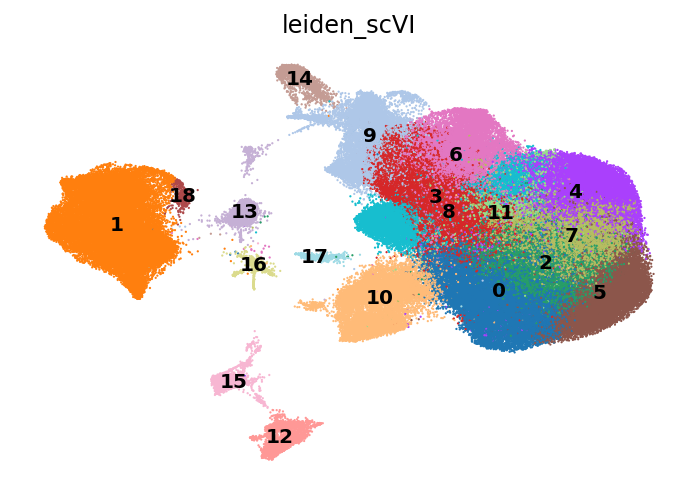

In [ ]:
sc.pl.umap(
    adata,
    color="leiden_scVI",
    frameon=False,
    legend_loc="on data",
    show=False,
    size=5
)

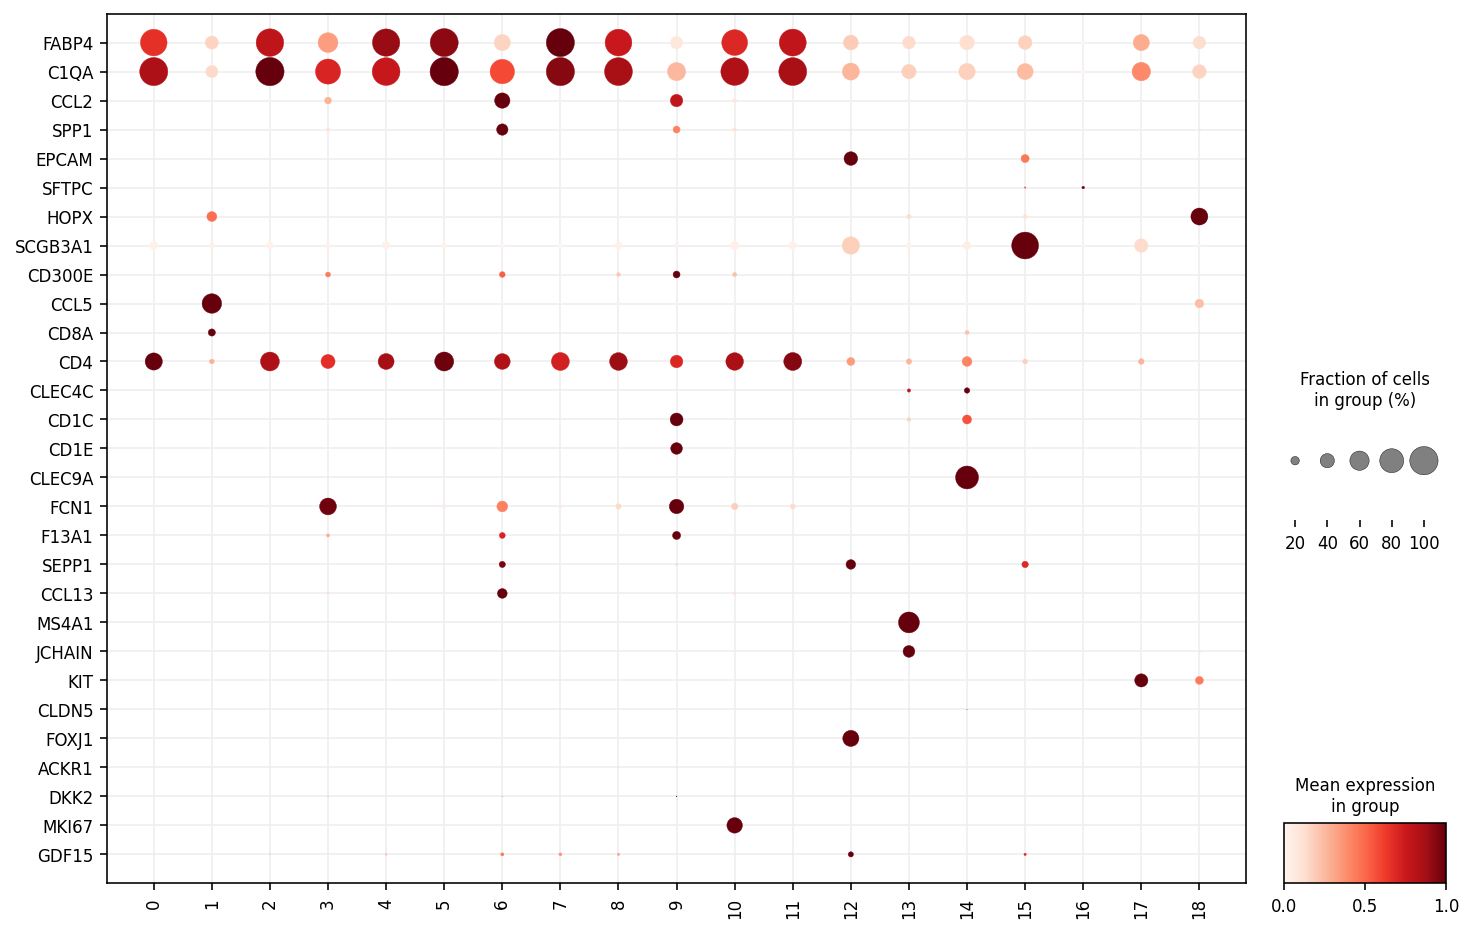

In [ ]:
ax = sc.pl.dotplot(
    adata,
    ["FABP4",  "C1QA", "CCL2", "SPP1", "EPCAM", "SFTPC", "HOPX", "SCGB3A1", "CD300E",
     "CCL5", "CD8A", "CD4", "CLEC4C", "CD1C", "CD1E", "CLEC9A", "FCN1", "F13A1", "SEPP1", "CCL13",
     "MS4A1", "JCHAIN", "KIT", "CLDN5", "FOXJ1",
     "ACKR1", "DKK2", "MKI67", "GDF15"],
    "leiden_scVI",
    swap_axes=True,
    figsize=(12, 8),
    standard_scale="var",
    edgecolor=None,
    show=False,
    zorder=2
)
ax["mainplot_ax"].grid(c="#eeeeee", zorder=0)

<AxesSubplot:title={'center':'leiden_scVI'}, xlabel='UMAP1', ylabel='UMAP2'>

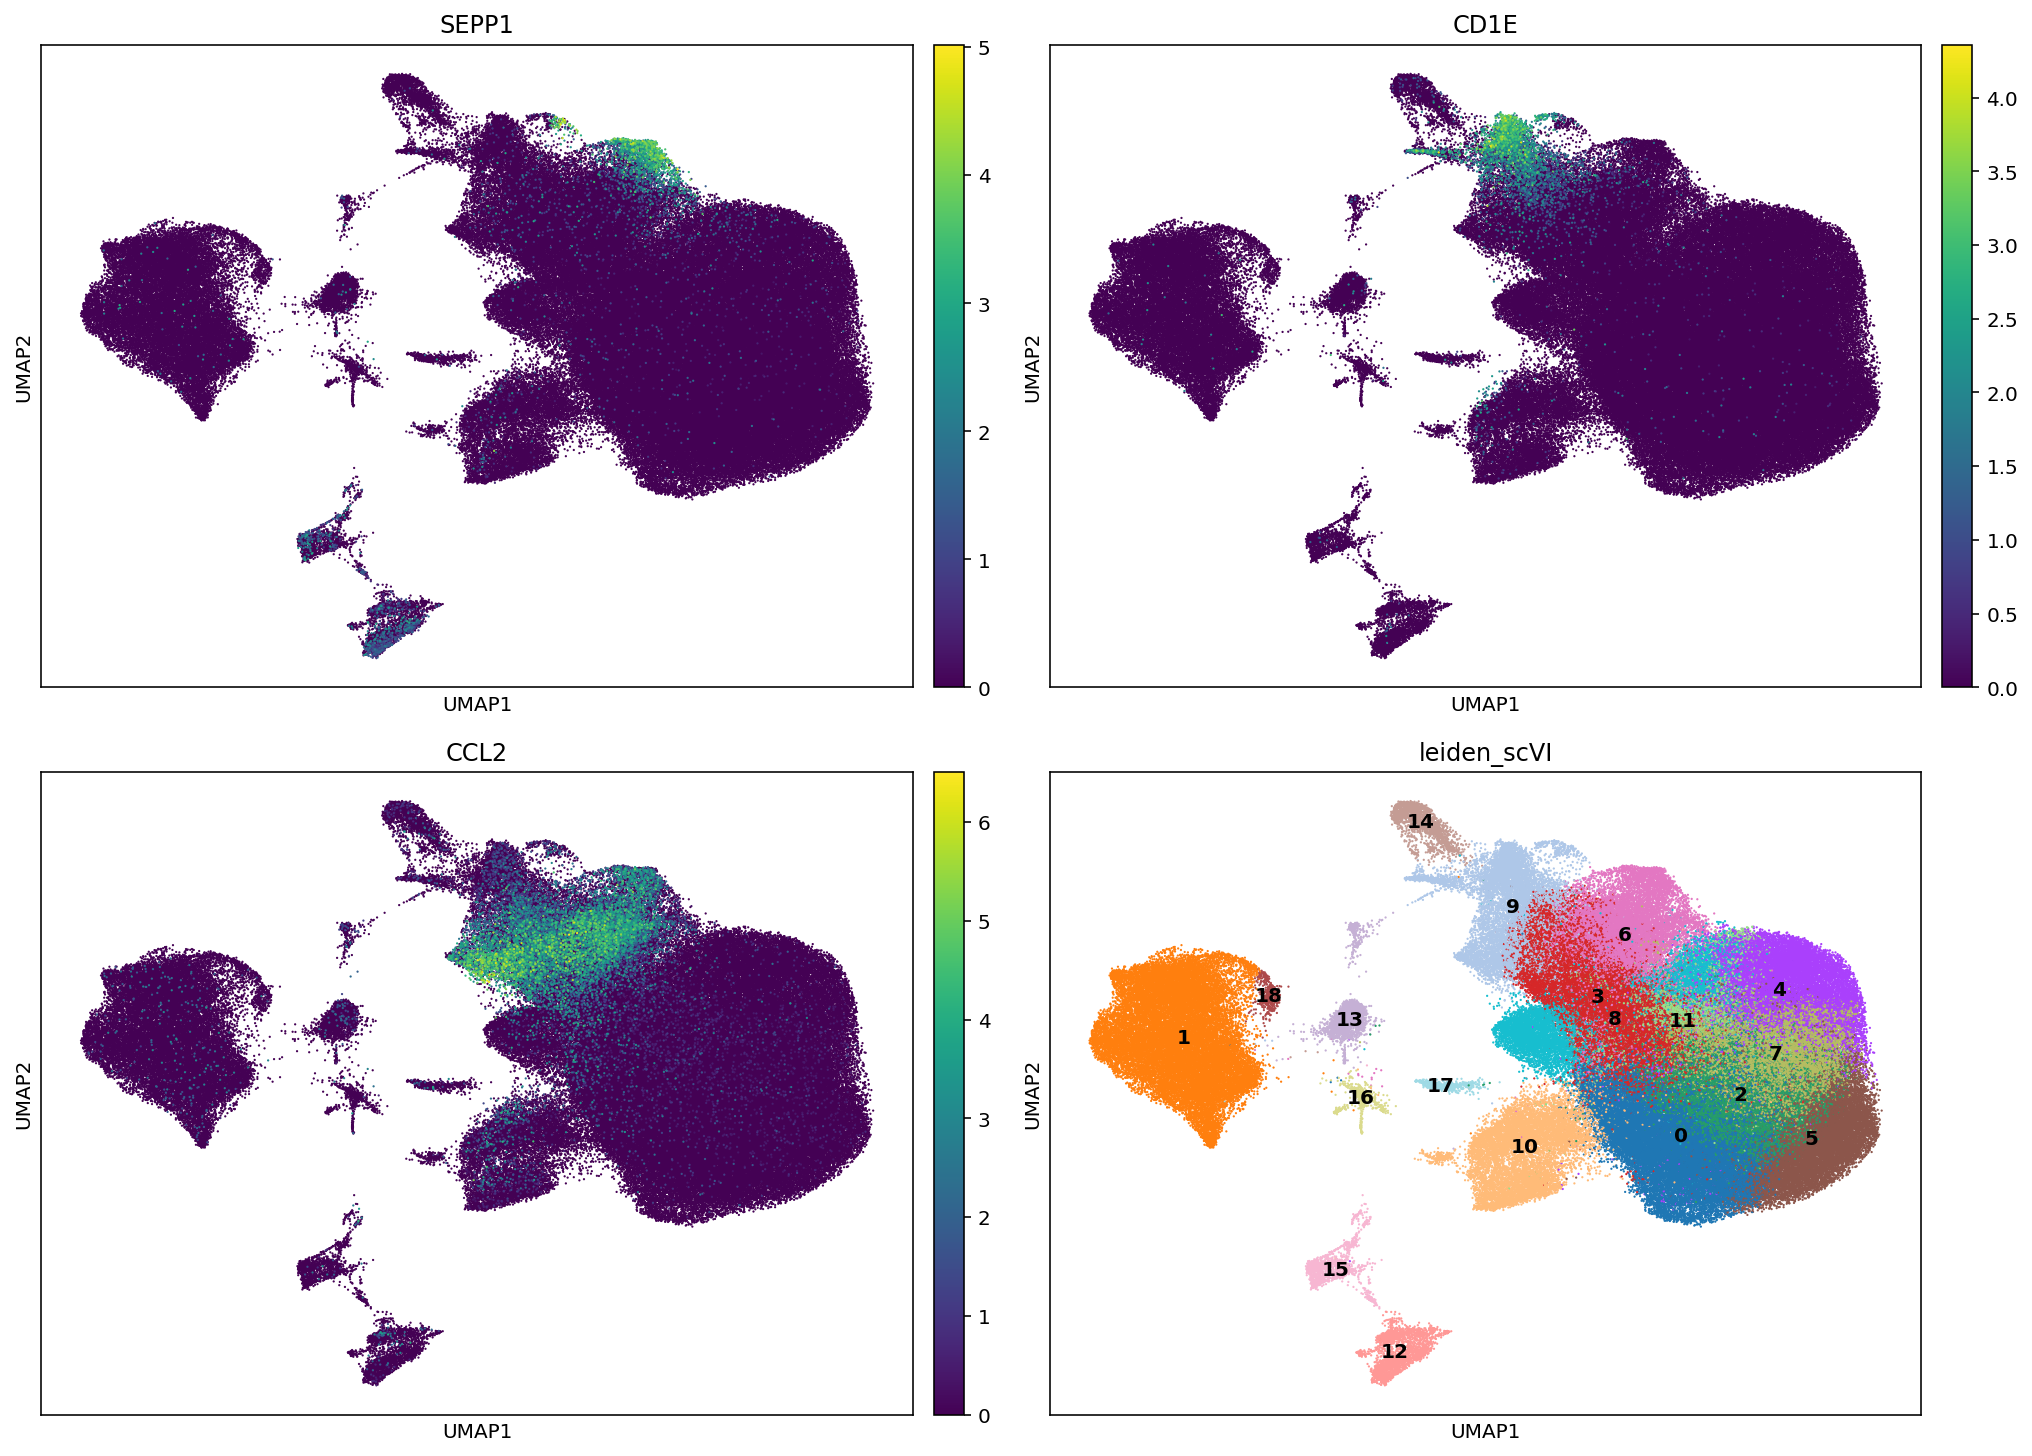

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), constrained_layout=True)

sc.pl.umap(
    adata,
    color="SEPP1",
    legend_loc="on data",
    size=5,
    show=False,
    ax=ax[0, 0]
)
sc.pl.umap(
    adata,
    color="CD1E",
    legend_loc="on data",
    size=5,
    show=False,
    ax=ax[0, 1]
)
sc.pl.umap(
    adata,
    color="CCL2",
    legend_loc="on data",
    size=5,
    show=False,
    ax=ax[1, 0]
)
sc.pl.umap(
    adata,
    color="leiden_scVI",
    legend_loc="on data",
    size=5,
    show=False,
    ax=ax[1, 1]
)

<AxesSubplot:xlabel='leiden scVI', ylabel='total_counts'>

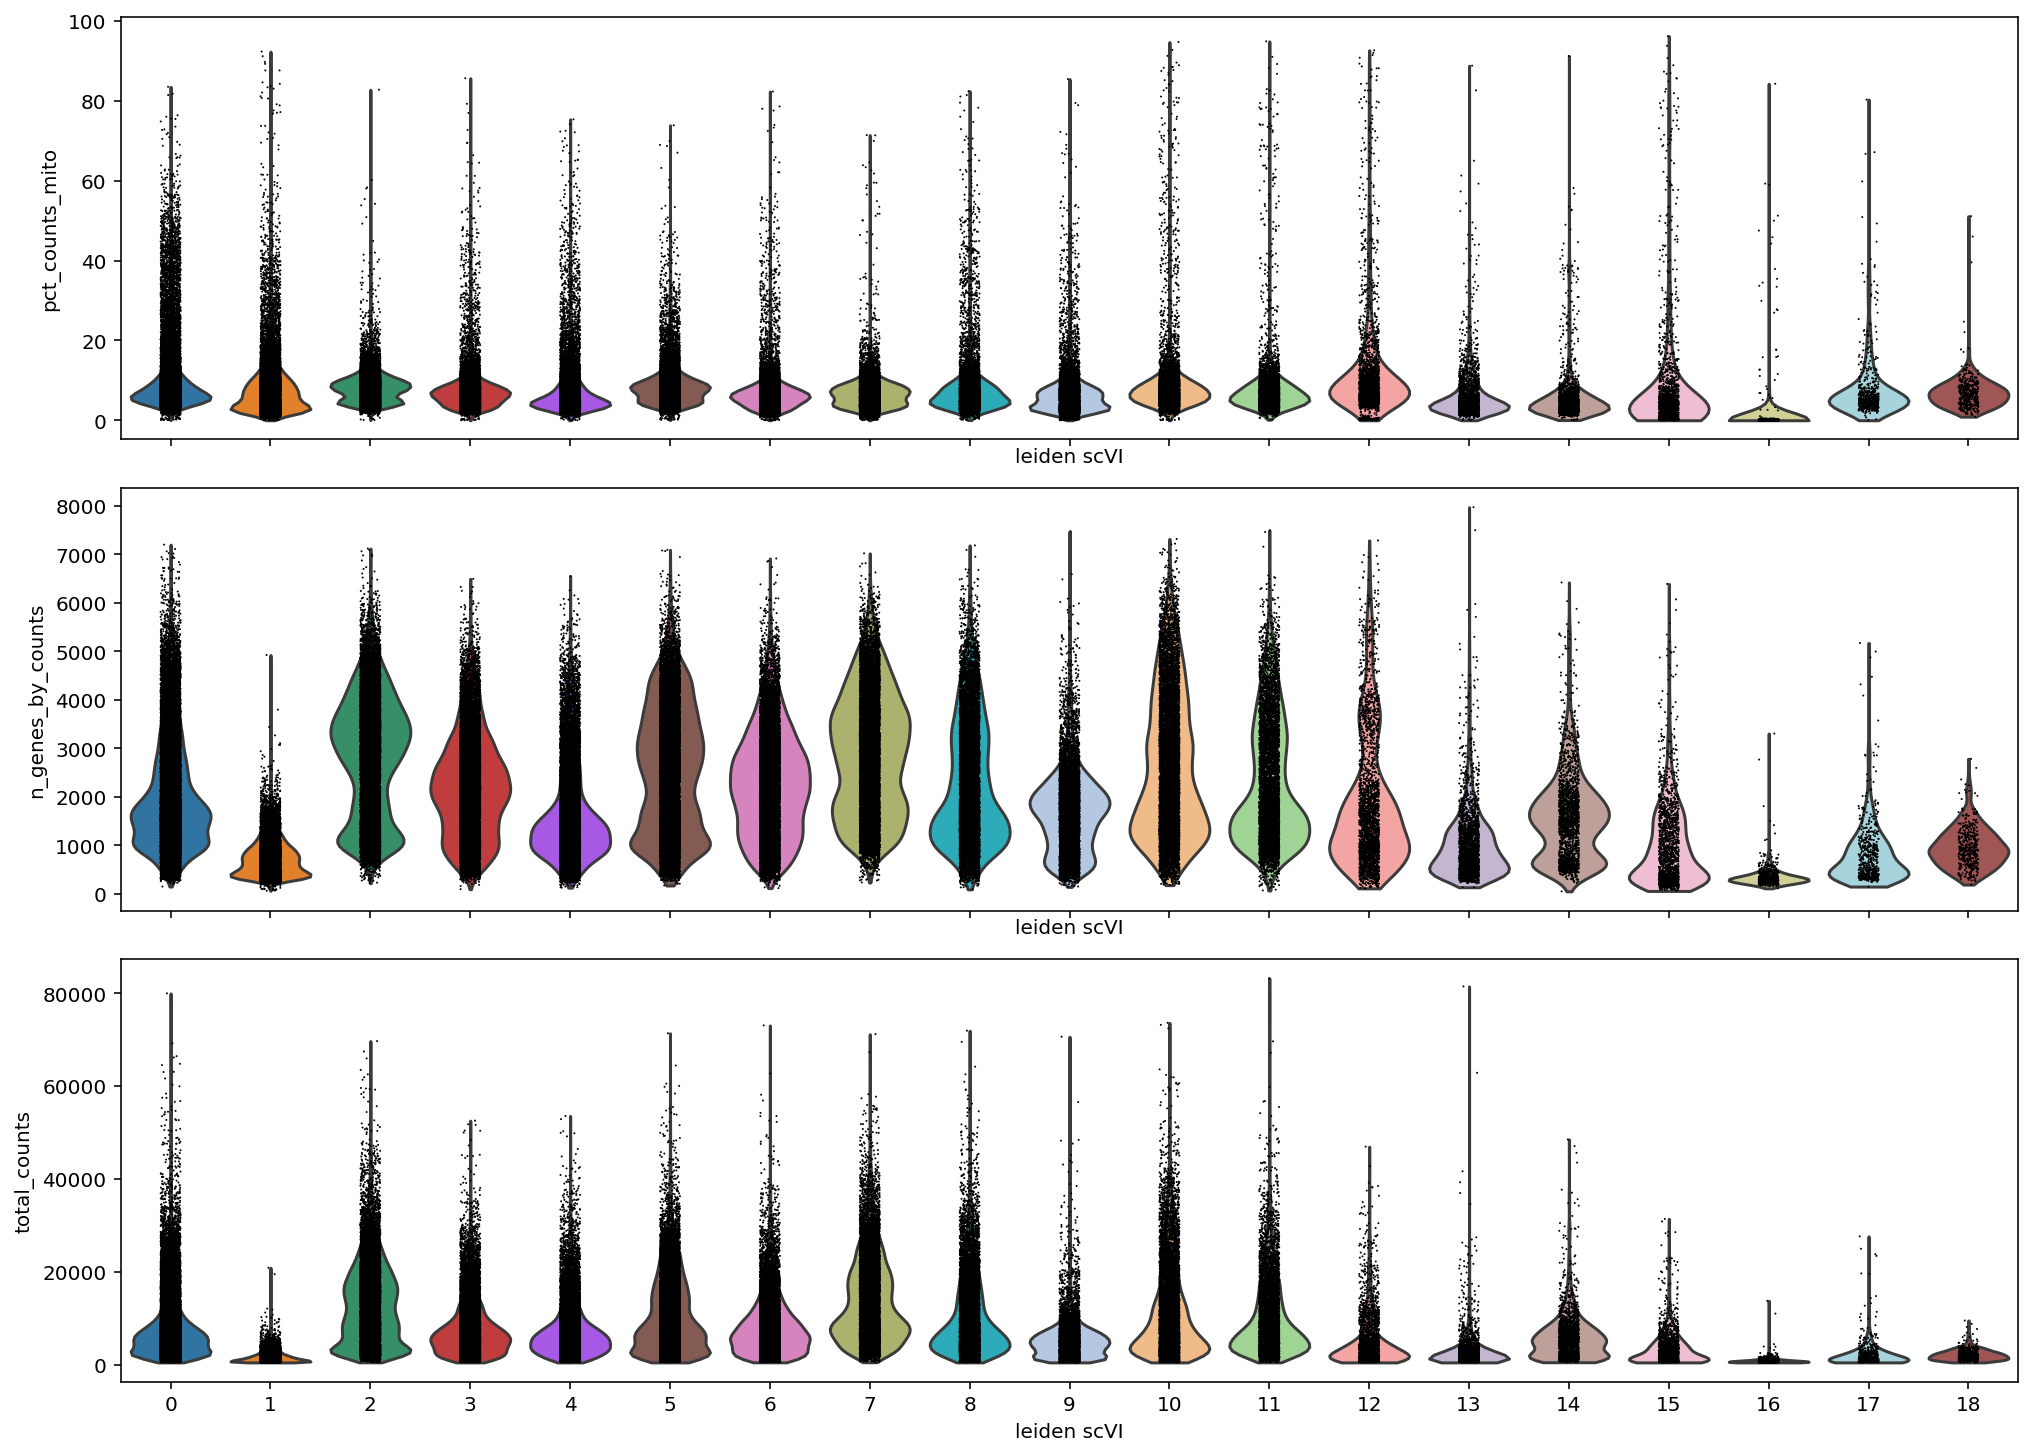

In [24]:
fig, ax = plt.subplots(nrows=3, figsize=(14, 10), constrained_layout=True, sharex=True)

sc.pl.violin(adata, "pct_counts_mito", groupby="leiden_scVI", ax=ax[0], show=False)
sc.pl.violin(adata, "n_genes_by_counts", groupby="leiden_scVI", ax=ax[1], show=False)
sc.pl.violin(adata, "total_counts", groupby="leiden_scVI", ax=ax[2], show=False)

In [25]:
adata.obs.leiden_scVI.value_counts()

0     30709
1     23749
2     19359
3     17473
4     16637
5     15887
6     14405
7     13879
8     11170
9     10705
10     9885
11     7168
12     2596
13     2337
14     1955
15     1681
16      731
17      592
18      404
Name: leiden_scVI, dtype: int64

In [26]:
sc.tl.rank_genes_groups(adata, "leiden_scVI", method="t-test", n_genes=200)

In [27]:
markers = sc_utils.get_markers(adata, "leiden_scVI")

In [28]:
markers.cluster = markers.cluster.astype(int)

In [29]:
markers.sort_values(["cluster", "avg_logFC"], ascending=[True, False], inplace=True)

In [30]:
markers.groupby("cluster").head(9)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0,0.000000e+00,2.277433,0.858966,0.426099,0.000000e+00,0,INHBA
74,0.000000e+00,1.821349,0.266013,0.109165,0.000000e+00,0,SPOCD1
8,0.000000e+00,1.709313,0.678954,0.382673,0.000000e+00,0,TGM2
70,0.000000e+00,1.617361,0.302517,0.144327,0.000000e+00,0,SLC19A3
2,0.000000e+00,1.611322,0.859878,0.564177,0.000000e+00,0,TFRC
165,0.000000e+00,1.497318,0.216581,0.098896,0.000000e+00,0,CSF1
131,0.000000e+00,1.492954,0.236250,0.118373,0.000000e+00,0,MGAT3
9,0.000000e+00,1.440885,0.769286,0.490719,0.000000e+00,0,LPL
1,0.000000e+00,1.437869,0.948126,0.674157,0.000000e+00,0,MCEMP1
282,0.000000e+00,7.722031,0.159796,0.002050,0.000000e+00,1,CD8B


In [31]:
adata.write(f"../../data/31_bal-object/02_integrated.h5ad")